# 017.00 - Defining Clusters - Density

### Import

In [8]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, color
from scipy.stats import multivariate_normal as mnorm
from matplotlib.colors import LogNorm
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform
from sklearn import mixture
from mpl_toolkits import mplot3d

### Fonts

In [9]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

# Defining Clusters based on Density
### Number of neighbors and maximum distance
For a distance-based algorithm, a cluster is typically parameterized by a centroid (e.g. K-means and Gaussian Mixture Models) and perhaps some measure of variance and covariance (e.g. Gaussian mixture models). In other words, clusters are composed of points relative to some specific origin. Such clustering is common, but definitely not the norm. Clusters can represent a large number natural occuring groupins of points, without them being tied to some center. Think of the canopy of a rain forest, with its rich variety of trees, plants, and animals. Viewed from above, trees of the same species cluster together not to form circular regions around some origin, but more like intracate intervowen patterns. Or think f the the spots or bands of alternating dark and light fur on a cat. Or think how a group of initially identical stem cells in an embryo keep dividing until large clusters of nearby cells take on a similar functions, given rise to distinctly different organs. Sure, they are localized, but their shapes are beyond what I can possible expect a single multivariate gaussian distribution to capture adequeatly. Densitypbased clustering algorithms allow us to relax this narrow definition of what constitutes a cluster. Instead, we group points together based on some measure of density in space. 

### Create Clustering based on some image

In [26]:
im1 = np.array(Image.open("../../data/test_images/smiley.png"))
im2 = np.array(Image.open("../../data/test_images/lynx_fur_pattern.png"))
im3 = np.array(Image.open("../../data/test_images/kandisnky_circles_in_circle_posterized.png"))

### To probabilities

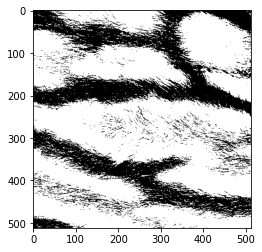

In [58]:
im1bw = np.mean(im2,axis=2)
im1bw = 255 - im1bw
im1bw = im1bw / 255
im1bw[im1bw < 0.5] = 0
im1bw[im1bw >= 0.5] = 1
plt.imshow(im1bw,cmap='gray');

### Create Data Set

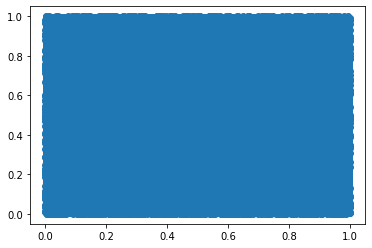

In [72]:
no_initial_samples = 100000
x = np.random.random((no_initial_samples,2))
xpos = (x * im1bw.shape[0]).astype(int)
z = im1bw[xpos[:,0],xpos[:,1]]
